In [2]:
# Dependencies
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymongo
import json

# Data path
data_path="Resources/data.csv"

# Read csv file load into a dataframe
tumor_df = pd.read_csv(data_path, delimiter=",")
tumor_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
# Deleting column with no values
tumor_df.drop(columns=['Unnamed: 32'], inplace=True)
print(len(tumor_df))

569


array([[<AxesSubplot:title={'center':'radius_mean'}>]], dtype=object)

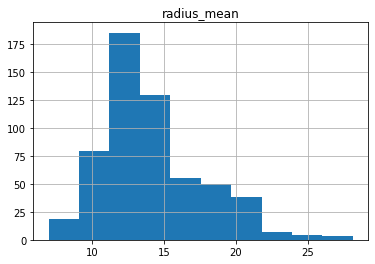

In [4]:
# Initial visualization to understand the data
tumor_df.hist("radius_mean")

In [7]:
# Calculating percentiles to divide the csv files into five csv files.
percent_list=list(np.percentile(tumor_df.radius_mean,[20,40,60,80,100]))
percent_list

[11.366, 12.726, 14.058000000000002, 17.067999999999998, 28.11]

In [5]:
# Create csv files based on the percentiles
df1=tumor_df.loc[tumor_df.radius_mean<percent_list[0]]
df1.to_csv(r"C:\\Users\Soni Mohandas\Documents\BootCamp\Project-2\Breast_cancer_prediction\Resources\tumor1.csv", index=False)

df2=tumor_df.loc[(tumor_df.radius_mean>=percent_list[0]) & (tumor_df.radius_mean<percent_list[1])]
df2.to_csv(r"C:\\Users\Soni Mohandas\Documents\BootCamp\Project-2\Breast_cancer_prediction\Resources\tumor2.csv", index=False)

df3=tumor_df.loc[(tumor_df.radius_mean>=percent_list[1]) & (tumor_df.radius_mean<percent_list[2])]
df3.to_csv(r"C:\\Users\Soni Mohandas\Documents\BootCamp\Project-2\Breast_cancer_prediction\Resources\tumor3.csv", index=False)

df4=tumor_df.loc[(tumor_df.radius_mean>=percent_list[2]) & (tumor_df.radius_mean<percent_list[3])]
df4.to_csv(r"C:\\Users\Soni Mohandas\Documents\BootCamp\Project-2\Breast_cancer_prediction\Resources\tumor4.csv",index=False)

df5=tumor_df.loc[tumor_df.radius_mean>=percent_list[3]]
df5.to_csv(r"C:\\Users\Soni Mohandas\Documents\BootCamp\Project-2\Breast_cancer_prediction\Resources\tumor5.csv",index=False)

In [6]:
# Function to create json files
def createJson(csvName, jsonName):    
    
    # loading csv files
    df1 = pd.read_csv(csvName, encoding = 'ISO-8859-1')

    # saving to json file
    df1.to_json(jsonName)
    
# Call function to create json files    
createJson("Resources/tumor1.csv", "Resources/tumor1.json")
createJson("Resources/tumor2.csv", "Resources/tumor2.json")
createJson("Resources/tumor3.csv", "Resources/tumor3.json")
createJson("Resources/tumor4.csv", "Resources/tumor4.json")
createJson("Resources/tumor5.csv", "Resources/tumor5.json")

In [7]:
# Making Connection
myclient = MongoClient("mongodb://localhost:27017/")

# create new database name: BreastCancer_DB
db = myclient["BreastCancer_DB"]

In [8]:
# Function to load json files into Mongo database
def createDB(collName, jsonName):
    
    # Created or Switched to collection name
    Col = db[collName]

    # Dropping collection if exists to avoid duplication
    Col.drop()

    # Loading or Opening the json file
    with open(jsonName) as file:
        file_data = json.load(file)

    # Inserting the loaded data in the Collection
    # if JSON contains data more than one entry
    # insert_many is used else inser_osne is used
    if isinstance(file_data, list):
        Col.insert_many(file_data)  
    else:
        Col.insert_one(file_data)

# Function call to create collections in Mongo database
createDB("tumor1", "Resources/tumor1.json")
createDB("tumor2", "Resources/tumor2.json")
createDB("tumor3", "Resources/tumor3.json")
createDB("tumor4", "Resources/tumor4.json")
createDB("tumor5", "Resources/tumor5.json")

In [9]:
t1 = db.get_collection("tumor1")
t1.find_one()

{'_id': ObjectId('61abeb5901adb2b3771bc6af'),
 'id': {'0': 8510824,
  '1': 855563,
  '2': 85713702,
  '3': 858477,
  '4': 858970,
  '5': 858981,
  '6': 859196,
  '7': 859464,
  '8': 859465,
  '9': 859471,
  '10': 859711,
  '11': 862261,
  '12': 862722,
  '13': 862980,
  '14': 862989,
  '15': 864018,
  '16': 864033,
  '17': 864292,
  '18': 864496,
  '19': 864726,
  '20': 868871,
  '21': 868999,
  '22': 869254,
  '23': 871001502,
  '24': 8710441,
  '25': 87106,
  '26': 871149,
  '27': 87127,
  '28': 871641,
  '29': 871642,
  '30': 872113,
  '31': 872608,
  '32': 874158,
  '33': 875099,
  '34': 879804,
  '35': 8811779,
  '36': 8812844,
  '37': 88147101,
  '38': 88199202,
  '39': 88203002,
  '40': 882488,
  '41': 883852,
  '42': 884437,
  '43': 88466802,
  '44': 8910251,
  '45': 8910720,
  '46': 8910748,
  '47': 8910996,
  '48': 8911230,
  '49': 8913049,
  '50': 891936,
  '51': 892399,
  '52': 892657,
  '53': 89346,
  '54': 894047,
  '55': 894329,
  '56': 894604,
  '57': 897132,
  '58': 89